1) Milk.txt is a time series of monthly milk production per cow with values from 01/1962 to 12/1975. Separate the data into two parts: a time series from 01/1962 to 12/1973 and another time series from 01/1974 to 12/1975. 

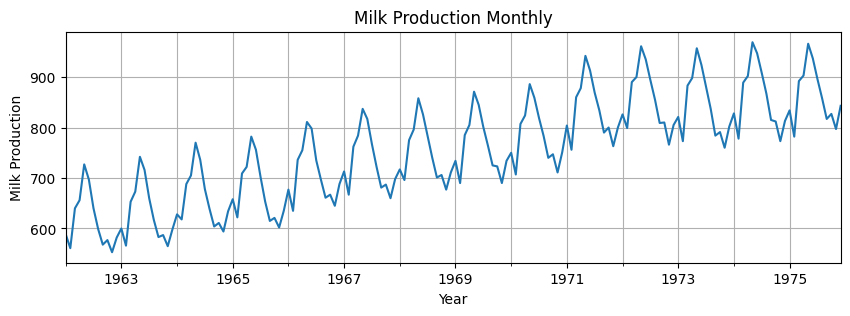

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Aquisição de dados
data = pd.read_csv('milk.txt', header=None)

ts = pd.Series(data[0].values, index=pd.date_range("1-1962", periods=len(data), freq="ME"))

# Plotando a série temporal
plt.figure(figsize=(10, 3))
ts.plot()
plt.title("Milk Production Monthly")
plt.xlabel("Year")
plt.ylabel("Milk Production")
plt.grid(which='both')

# Separação dos conjuntos de treino e teste
ts_train = ts[:"1973-12"]
ts_test = ts["1974-01":]

- Perform the decomposition of the first part using STL decomposition and show the graphics. 
- Predict the production for the years 1974 to 1975 using the seasonality component of the STL and the autoregressive (AR) model to predict the trend + residual components. 
- Show the graphics of actual values and predicted values. 
- Calculate the MSE of the prediction. 

In Python, the following functions can be used:
- from statsmodels.tsa.seasonal import STL
- from statsmodels.tsa.ar_model import AutoReg


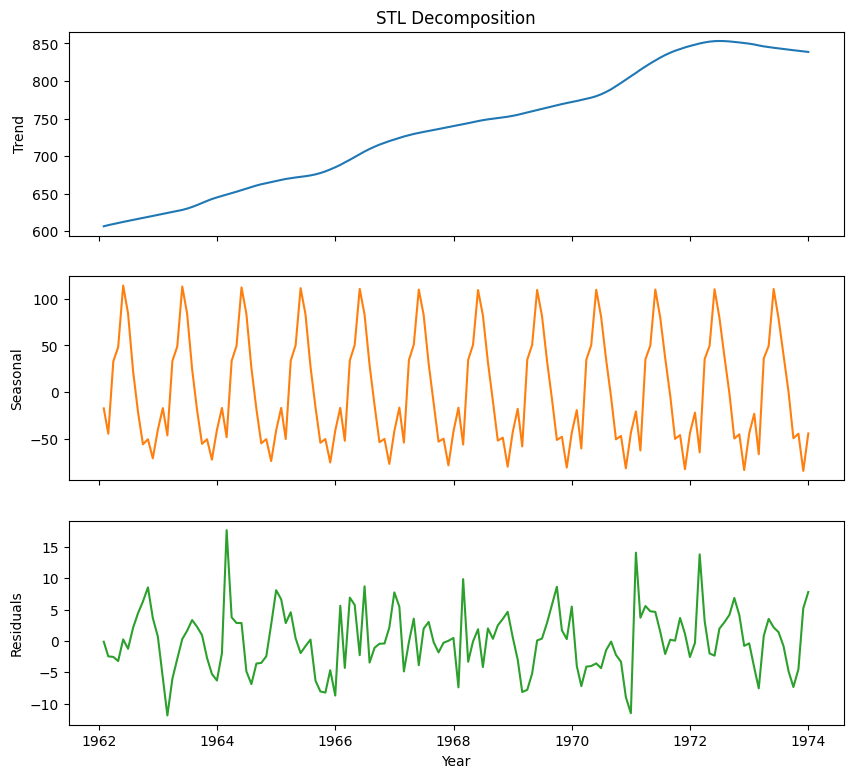

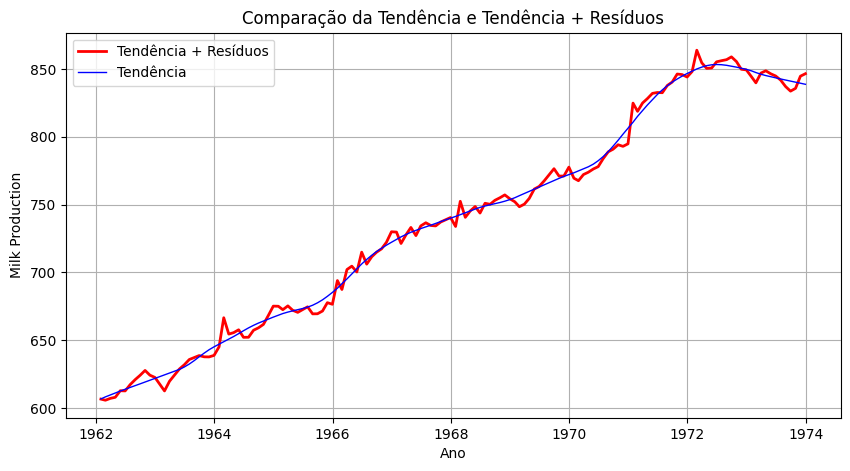

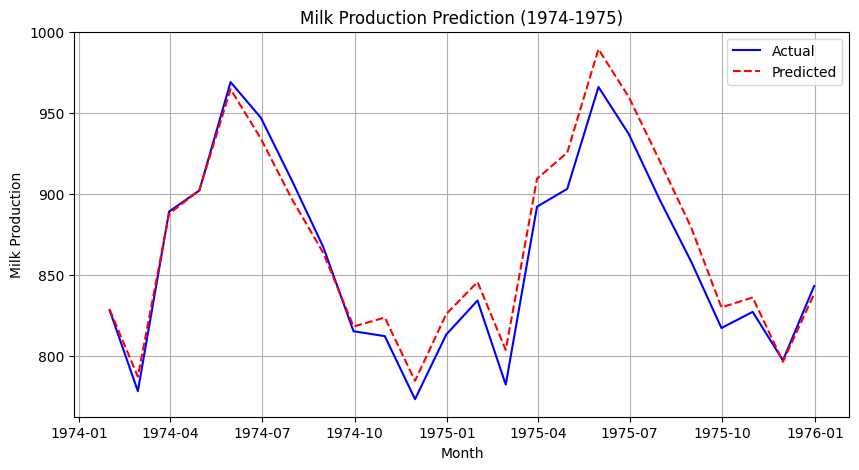

In [3]:
# seasonal – Define a janela da média móvel para suavizar a sazonalidade. 
# Deve ser ímpar maior ou igual ao período sazonal.
stl = STL(ts_train, seasonal=13) #sazonalidade mensal
STL_decomposition = stl.fit()

# Plotando a decomposição
fig, axes = plt.subplots(3, 1, figsize=(10, 9), sharex=True)
axes[0].plot(STL_decomposition.trend, label='Trend', color='tab:blue')
axes[1].plot(STL_decomposition.seasonal, label='Seasonality', color='tab:orange')
axes[2].plot(STL_decomposition.resid, label='Residuals', color='tab:green')

axes[0].set_title('STL Decomposition')
axes[0].set_ylabel('Trend')
axes[1].set_ylabel('Seasonal')
axes[2].set_ylabel('Residuals')
axes[2].set_xlabel('Year')
plt.show()

trend_resid = STL_decomposition.trend + STL_decomposition.resid

# Gráfico de tendência + resíduos
fig = plt.figure(figsize=(10, 5))
plt.plot(trend_resid, c="red", lw=2, label="Tendência + Resíduos")
plt.plot(STL_decomposition.trend, c="blue", lw=1, label="Tendência")
plt.legend()
plt.title("Comparação da Tendência e Tendência + Resíduos")
plt.xlabel("Ano")
plt.ylabel("Milk Production")
plt.grid(which='both')
plt.show()

# Modelo Autorregressivo (AR) para previsão da tendência + resíduos
train_residual_trend = STL_decomposition.trend + STL_decomposition.resid
ar_model = AutoReg(train_residual_trend.dropna(), lags=24).fit()

ts_pred_trend_resid = ar_model.predict(start=len(train_residual_trend), end=len(train_residual_trend) + len(ts_test) - 1)
# Reconstituindo a previsão final
seasonal_test = STL_decomposition.seasonal[-12:].values  # Último ano de sazonalidade
seasonal_forecast = np.tile(seasonal_test, len(ts_test) // 12)
ts_pred = ts_pred_trend_resid.values + seasonal_forecast

# Plotando valores reais e previstos
plt.figure(figsize=(10, 5))
plt.plot(ts_test.index, ts_test, label="Actual", color="blue")
plt.plot(ts_test.index, ts_pred, label="Predicted", linestyle="dashed", color="red")
plt.xlabel("Month")
plt.ylabel("Milk Production")
plt.title("Milk Production Prediction (1974-1975)")
plt.grid(which='both')
plt.legend()
plt.show()


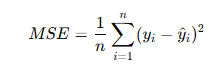

In [4]:
def mean_squared_error_implemented(y_true, y_pred):
    """
    Calcula o erro quadrático médio entre os valores reais e preditos.
    
    Parâmetros:
    - y_true: array-like, valores reais
    - y_pred: array-like, valores preditos
    
    Retorna:
    - mse: float, erro quadrático médio
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred) ** 2)


# Avaliação do modelo
mse = mean_squared_error(ts_test, ts_pred)
mse_implemented = mean_squared_error_implemented(ts_test, ts_pred)
print(f"MSE Scikit-Learn: {mse:.2f}")
print(f"MSE Implemented: {mse_implemented:.2f}")

MSE Scikit-Learn: 191.29
MSE Implemented: 191.29


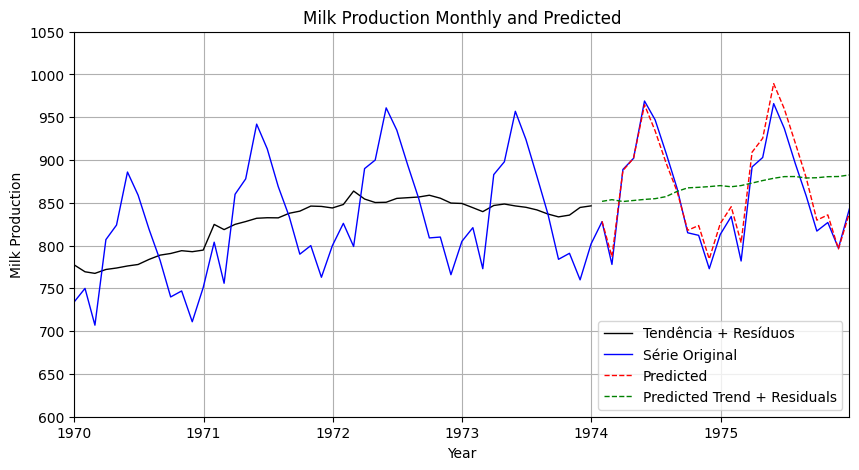

In [5]:
# Plotando a série temporal
plt.figure(figsize=(10, 5))
plt.plot(trend_resid, c="black", lw=1, label="Tendência + Resíduos")
plt.plot(ts, c="blue", lw=1, label="Série Original")
plt.plot(ts_test.index, ts_pred, label="Predicted", linestyle="dashed", color="red", lw=1)
plt.plot(ts_pred_trend_resid, label="Predicted Trend + Residuals", linestyle="dashed", color="green", lw=1)
plt.title("Milk Production Monthly and Predicted")
plt.xlim(pd.Timestamp("1970-01-01"), pd.Timestamp(f"{ts.index.max().year}-12-31"))
plt.ylim(600,1050)
plt.legend(loc="lower right")
plt.xlabel("Year")
plt.ylabel("Milk Production")
plt.grid(which='both')